In [25]:
import numpy as np
import pandas as pd

In [26]:
%matplotlib inline

In [27]:
# load dataset into Pandas DataFrame
file = pd.ExcelFile('MedData.xlsx')
df = pd.read_excel(file, names=['f1','f2','diagnosis'])
df

,f1,f2,diagnosis
0,700,0.14,2
1,640,0.15,2
2,690,0.15,2
3,550,0.13,2
4,650,0.15,2
...,...,...,...
95,670,0.23,3
96,630,0.19,3
97,650,0.20,3
98,620,0.23,3


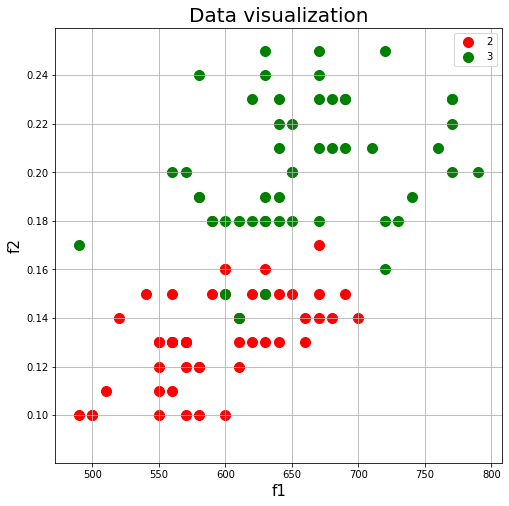

In [28]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('f1', fontsize = 15)
ax.set_ylabel('f2', fontsize = 15)
ax.set_title('Data visualization', fontsize = 20)
targets = [2, 3]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df['diagnosis'] == target
    ax.scatter(df.loc[indicesToKeep, 'f1'],
               df.loc[indicesToKeep, 'f2'],
               c = color,
               s = 100)
ax.legend(targets)
ax.grid()

In [29]:
features = ['f1', 'f2']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
#y = df.loc[:,['diagnosis']].values
allData = df.values
y = allData[:,-1]

print(x[:10,:])
y

[[7.0e+02 1.4e-01]
 [6.4e+02 1.5e-01]
 [6.9e+02 1.5e-01]
 [5.5e+02 1.3e-01]
 [6.5e+02 1.5e-01]
 [5.7e+02 1.3e-01]
 [6.3e+02 1.6e-01]
 [4.9e+02 1.0e-01]
 [6.6e+02 1.3e-01]
 [5.2e+02 1.4e-01]]


array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])

# K-means

In [30]:
from sklearn.cluster import KMeans
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)

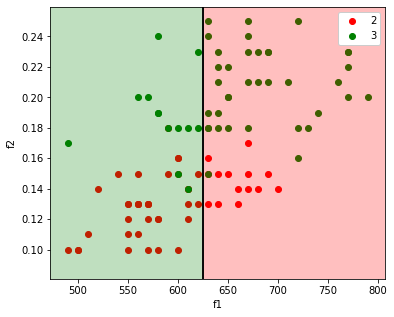

In [31]:
def draw_separ_curve(model, res = 500):
    xx0_min, xx0_max = plt.xlim()
    xx1_min, xx1_max = plt.ylim()
    xx0, xx1 = np.meshgrid(np.linspace(xx0_min, xx0_max, res), np.linspace(xx1_min, xx1_max, res))
    yy = model.predict(np.hstack((np.reshape(xx0, (res**2, 1)), np.reshape(xx1, (res**2, 1)))))   
    yy = yy.reshape(xx0.shape)
    plt.contourf(xx0, xx1, yy, 1, alpha = 0.25, colors = ('r', 'g'))
    plt.contour(xx0, xx1, yy, 1, colors = 'k')
    plt.xlim((xx0_min, xx0_max))
    plt.ylim((xx1_min, xx1_max)) 

plt.figure(figsize = (6, 5))
plt.scatter(x[y == 2, 0], x[y == 2, 1], color = 'r', alpha = 1, label = '2')
plt.scatter(x[y == 3, 0], x[y == 3, 1], color = 'g', alpha = 1, label = '3')
draw_separ_curve(kmeans)
plt.xlabel('f1')
plt.ylabel('f2')
plt.legend(framealpha = 1)

In [32]:
kmeans.score(x,y)
print(y_kmeans)

[0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0
 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1]


In [33]:
from sklearn import metrics
import copy
y_k = copy.copy(y)
y_k[y == 2] = 0
y_k[y == 3] = 1

# make predictions
expected = y_k
predicted = y_kmeans
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

         0.0       0.27      0.28      0.28        50
         1.0       0.27      0.26      0.26        50

    accuracy                           0.27       100
   macro avg       0.27      0.27      0.27       100
weighted avg       0.27      0.27      0.27       100

[[14 36]
 [37 13]]


# Как это исправить?

In [34]:
from sklearn.preprocessing import StandardScaler
# Standardizing the features
x_stan = StandardScaler().fit_transform(x)
print(x_stan[:10,:])

# Fitting K-Means to the dataset
kmeans_st = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans_st = kmeans_st.fit_predict(x_stan)

[[ 1.11900931 -0.65303909]
 [ 0.20924564 -0.41643072]
 [ 0.96738203 -0.41643072]
 [-1.15539985 -0.88964745]
 [ 0.36087292 -0.41643072]
 [-0.8521453  -0.88964745]
 [ 0.05761837 -0.17982236]
 [-2.06516352 -1.59947255]
 [ 0.5125002  -0.88964745]
 [-1.61028169 -0.65303909]]


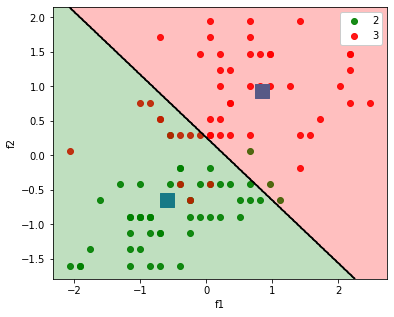

In [35]:
# outputs
centers = kmeans_st.cluster_centers_

plt.figure(figsize = (6, 5))
plt.scatter(x_stan[y == 2, 0], x_stan[y == 2, 1], color = 'g', alpha = 0.9, label = '2')
plt.scatter(x_stan[y == 3, 0], x_stan[y == 3, 1], color = 'r', alpha = 0.9, label = '3')
plt.scatter(centers[:,0], centers[:,1], marker="s", s=200)
draw_separ_curve(kmeans_st)
plt.xlabel('f1')
plt.ylabel('f2')
plt.legend(framealpha = 1)

In [36]:
kmeans_st.score(x_stan,y)

-90.47086956138737

In [37]:
import copy
y_k = copy.copy(y)
y_k[y == 2] = 1
y_k[y == 3] = 0

# make predictions
expected = y_k
predicted = y_kmeans_st
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

         0.0       0.93      0.76      0.84        50
         1.0       0.80      0.94      0.86        50

    accuracy                           0.85       100
   macro avg       0.86      0.85      0.85       100
weighted avg       0.86      0.85      0.85       100

[[38 12]
 [ 3 47]]


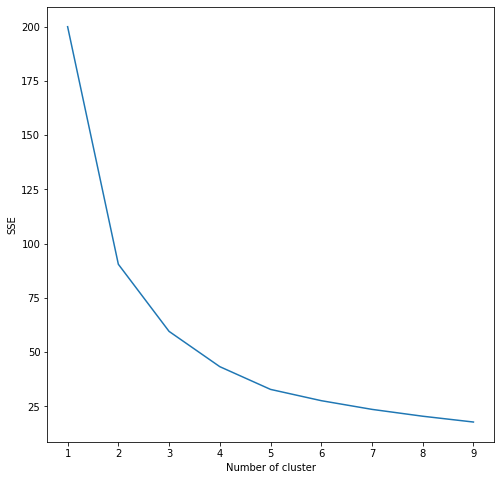

In [38]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(x_stan)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure(figsize = (8, 8))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

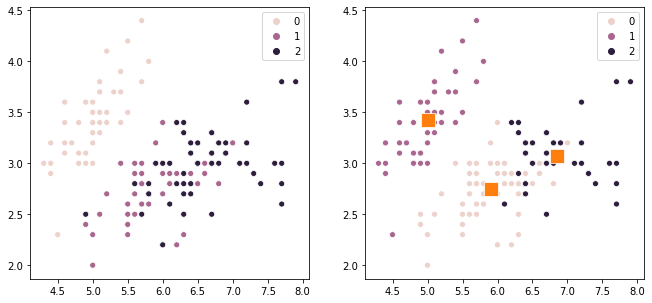

In [50]:
# Импортируем библиотеки
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from seaborn import scatterplot as scatter
#from sklearn.cluster import DBSCAN

# Загружаем датасет
iris = load_iris()

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(iris.data)

# outputs
centers = kmeans.cluster_centers_

f, axes = plt.subplots(1, 2, figsize=(11,5))
scatter(iris.data[:,0], iris.data[:,1], ax=axes[0], hue=iris.target)
scatter(iris.data[:,0], iris.data[:,1], ax=axes[1], hue=y_kmeans)
scatter(centers[:,0], centers[:,1], ax=axes[1], marker="s",s=200)
plt.show()



In [47]:
centers

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

# Иерархическая кластеризация

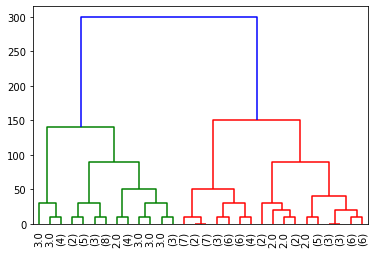

In [53]:
from scipy.cluster.hierarchy import linkage, dendrogram


# Исключаем информацию о диагнозе, сохраняем для дальнейшего использования
varieties = list(y)

# Извлекаем измерения как массив NumPy
samples = x

# Реализация иерархической кластеризации при помощи функции linkage
diagnoz = linkage(samples, method='complete', metric='euclidean')

# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(diagnoz,
           truncate_mode = 'lastp',
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=10,
           )
plt.show()


# DBSCAN


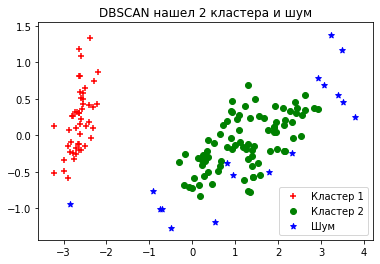

In [54]:
# Импортируем библиотеки
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Загружаем датасет
iris = load_iris()

# Определяем модель
dbscan = DBSCAN()

# Обучаем
dbscan.fit(iris.data)

# Уменьшаем размерность при помощи метода главных компонент
pca = PCA(n_components=2).fit(iris.data)
pca_2d = pca.transform(iris.data)

# Строим в соответствии с тремя классами
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Кластер 1', 'Кластер 2', 'Шум'])
plt.title('DBSCAN нашел 2 кластера и шум')
plt.show()

In [58]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [59]:
from sklearn import metrics
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering, DBSCAN

data = datasets.load_iris()
X, y = data.data, data.target

algorithms = []
algorithms.append(KMeans(n_clusters=3, random_state=1))
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=3, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=3))
algorithms.append(DBSCAN())

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_),
        'Silhouette': metrics.silhouette_score(X, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means', 'Affinity', 
                              'Spectral', 'Agglomerative', 'DBSCAN'])

results

/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.730238,0.755119,0.751485,0.764986,0.758176,0.552819
Affinity,0.481172,0.659933,0.914941,0.527822,0.669446,0.347408
Spectral,0.759199,0.803229,0.795982,0.815646,0.805694,0.554161
Agglomerative,0.731199,0.767167,0.760801,0.779596,0.770084,0.554324
DBSCAN,0.520619,0.598995,0.559946,0.656558,0.604416,0.486034


In [61]:
data

[{'ARI': 0.7302382722834697,
  'AMI': 0.7551191675800484,
  'Homogenity': 0.7514854021988339,
  'Completeness': 0.7649861514489816,
  'V-measure': 0.7581756800057786,
  'Silhouette': 0.5528190123564091},
 {'ARI': 0.48117164749865804,
  'AMI': 0.6599333553254316,
  'Homogenity': 0.9149410296693684,
  'Completeness': 0.5278221404408368,
  'V-measure': 0.6694461608974132,
  'Silhouette': 0.34740819370555975},
 {'ARI': 0.7591987071071522,
  'AMI': 0.8032287370935431,
  'Homogenity': 0.7959816227812412,
  'Completeness': 0.8156456882407057,
  'V-measure': 0.805693691215336,
  'Silhouette': 0.5541608580282847},
 {'ARI': 0.7311985567707745,
  'AMI': 0.767166961571311,
  'Homogenity': 0.7608008469718723,
  'Completeness': 0.7795958005591144,
  'V-measure': 0.7700836616487869,
  'Silhouette': 0.5543236611296415},
 {'ARI': 0.5206185241703302,
  'AMI': 0.5989947874137124,
  'Homogenity': 0.5599460100861128,
  'Completeness': 0.6565579648058795,
  'V-measure': 0.6044156375501386,
  'Silhouette': 0